In [1]:
from vnstock import Vnstock
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Vnstock with REE symbol
stock = Vnstock().stock(symbol='REE', source='VCI')

# Get historical data for REE
# Using a reasonable date range (you can adjust these dates as needed)
ree_hist = stock.quote.history(symbol='REE', 
                               start='2023-01-01', 
                               end='2025-05-26',  # Current date
                               interval='1D')     # Daily data

# Display the first few rows of the data
print("REE Stock Price Data:")
print(ree_hist.head())



Phiên bản Vnstock 3.2.6 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.5

REE Stock Price Data:
        time   open   high    low  close  volume
0 2023-01-03  51.57  53.38  51.57  52.44  276158
1 2023-01-04  53.17  53.17  52.23  52.88  213149
2 2023-01-05  52.59  53.89  52.59  53.89  393921
3 2023-01-06  53.38  53.89  52.80  53.74  153430
4 2023-01-09  53.82  54.11  52.44  53.09  231128


In [2]:
ree_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    593 non-null    datetime64[ns]
 1   open    593 non-null    float64       
 2   high    593 non-null    float64       
 3   low     593 non-null    float64       
 4   close   593 non-null    float64       
 5   volume  593 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 27.9 KB


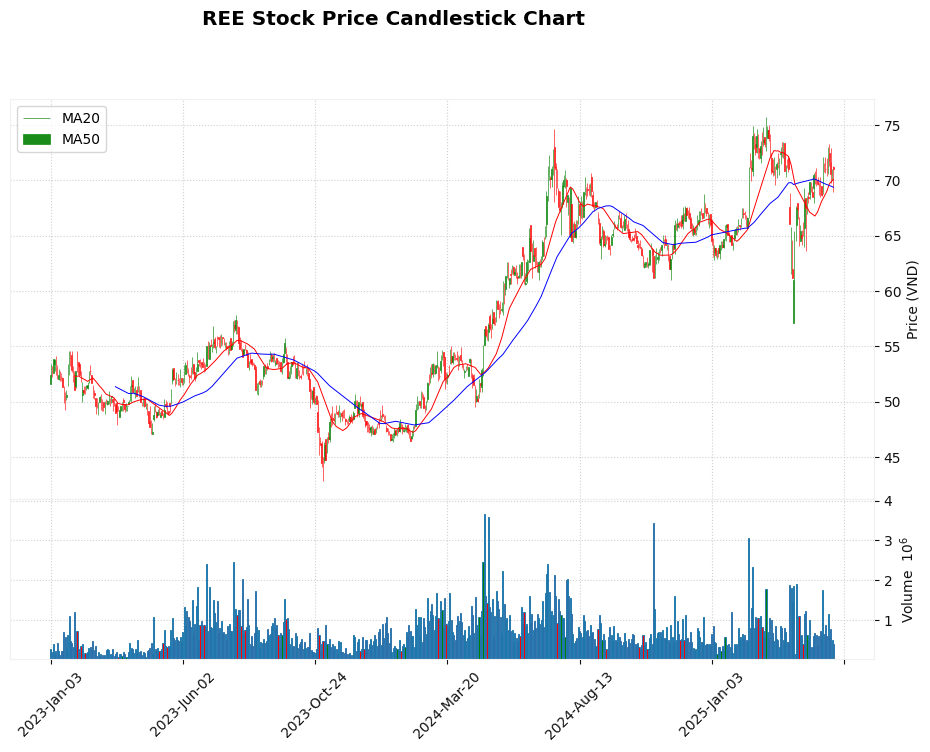

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# mplfinance requires the DataFrame to be indexed by the date/time
# Convert time column to datetime if it's not already
ree_hist['time'] = pd.to_datetime(ree_hist['time'])

# Set the time column as the index
ree_hist = ree_hist.set_index('time')

# Add some technical indicators - Moving Averages
ree_hist['MA20'] = ree_hist['close'].rolling(window=20).mean()
ree_hist['MA50'] = ree_hist['close'].rolling(window=50).mean()

# Create a plot with mplfinance
# Define Moving Average overlays
ma20 = mpf.make_addplot(ree_hist['MA20'], color='red', width=0.7)
ma50 = mpf.make_addplot(ree_hist['MA50'], color='blue', width=0.7)

# Define the chart style
mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc, 
                      gridstyle=':', facecolor='white')

# Create the plot
fig, axes = mpf.plot(ree_hist, 
                    type='candle', 
                    style=s,
                    title='REE Stock Price Candlestick Chart',
                    ylabel='Price (VND)',
                    addplot=[ma20, ma50],
                    volume=True,
                    figsize=(12, 8),
                    returnfig=True)

# Add a legend
axes[0].legend(['MA20', 'MA50'])

# Rotate date labels for better readability
for label in axes[0].get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

# Save the figure
#plt.savefig('.outputs/ree_candlestick_chart.png')
plt.show()